In [ ]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points = np.random.rand(30, 3) # generate random 3D points
tri = Delaunay(points) # triangulate the points
print(tri)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

# plot the surface
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=tri.simplices, cmap=plt.cm.Spectral)
plt.show()


In [ ]:
from typing import List, Tuple

def art_gallery(points: List[Tuple[int, int]], n: int) -> int:
    # Sort the points by x-coordinate
    points.sort()
    # Create an empty list to store the cameras
    cameras = []
    # Iterate over the points
    for point in points:
        # Check if the point is visible from the last camera
        while len(cameras) > 1 and not is_left(cameras[-2], cameras[-1], point):
            cameras.pop()
        # Add the point as a camera
        cameras.append(point)
    # Return the number of cameras
    return len(cameras)

def is_left(a: Tuple[int, int], b: Tuple[int, int], c: Tuple[int, int]) -> bool:
    #Check if point c is on the left of line ab
    return (b[0] - a[0]) * (c[1] - a[1]) > (b[1] - a[1]) * (c[0] - a[0])

In [ ]:
from typing import List, Tuple

def art_gallery(outer_boundary: List[Tuple[int, int]], holes: List[List[Tuple[int, int]]], n: int) -> int:
    # Sort the points of the outer boundary by x-coordinate
    outer_boundary.sort()
    # Create an empty list to store the cameras
    cameras = []
    # Iterate over the points of the outer boundary
    for point in outer_boundary:
        # Check if the point is visible from the last camera
        while len(cameras) > 1 and not is_left(cameras[-2], cameras[-1], point):
            cameras.pop()
        cameras.append(point)
    # Iterate over the holes
    for hole in holes:
        # Sort the points of the hole by x-coordinate
        hole.sort()
        # Initialize the index of the last camera
        i = 0
        # Iterate over the points of the hole
        for point in hole:
            # Check if the point is visible from the last camera
            while i < len(cameras) - 1 and not is_left(cameras[i], cameras[i+1], point):
                i += 1
            if i < len(cameras) - 1:
                cameras[i] = point
    # Return the number of cameras
    return len(cameras)

def is_left(a: Tuple[int, int], b: Tuple[int, int], c: Tuple[int, int]) -> bool:
    #Check if point c is on the left of line ab
    return (b[0] - a[0]) * (c[1] - a[1]) > (b[1] - a[1]) * (c[0] - a[0])


In [ ]:
from typing import List, Tuple

def ear_clipping(polygon: List[Tuple[float, float]]) -> List[Tuple[Tuple[float, float], Tuple[float, float], Tuple[float, float]]]:
    def is_ear(i, polygon, indices):
        """
        Helper function to check if the vertex with index i is an ear
        """
        p = polygon[indices[i]]
        prev = polygon[indices[i-1]]
        next = polygon[indices[(i+1) % len(indices)]]
        # Check if the triangle formed by the vertex and its two neighbors is convex
        if (prev[0] - p[0]) * (next[1] - p[1]) - (prev[1] - p[1]) * (next[0] - p[0]) < 0:
            return False
        # Check if the triangle formed by the vertex and its two neighbors contains any other vertex of the polygon
        for j in range(len(indices)):
            if j != i and j != i-1 and j != (i+1) % len(indices):
                if point_in_triangle(polygon[indices[j]], prev, p, next):
                    return False
        return True
    
    def point_in_triangle(p, a, b, c):
        """
        Helper function to check if the point p is inside the triangle formed by the points a, b, c
        """
        def sign(p1, p2, p3):
            return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

        b1 = sign(p, a, b) < 0
       


In [ ]:
from scipy.spatial import Delaunay
import numpy as np

# Define the 3D points of the polygon
points = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

# Create the Delaunay triangulation
tri = Delaunay(points)

# Print the simplices (indices of the points forming each triangle)
print(tri.simplices)




In [ ]:
from shapely.geometry import Polygon, MultiPoint
from shapely.ops import triangulate

points = [(0,0,0), (1,0,0), (1,1,0), (0,1,0), (0,0,1), (1,0,1), (1,1,1), (0,1,1)]

poly = Polygon(points)

triangles = triangulate(poly)

print(triangles)

In [ ]:
import numpy as np

def triangulate_polygon(vertices):
    # Create an empty list to store the resulting triangles
    triangles = []
    
    # Create a list of the vertex indices (i.e. the order in which they appear in the polygon)
    vertex_indices = list(range(len(vertices)))
    
    # Loop through the vertex indices, removing ears as we go
    while len(vertex_indices) > 3:
        # Iterate through the vertex indices in a cyclic fashion
        for i in range(len(vertex_indices)):
            # Get the current vertex and the previous and next vertices
            vertex = vertices[vertex_indices[i]]
            prev_vertex = vertices[vertex_indices[i-1]]
            next_vertex = vertices[vertex_indices[(i+1) % len(vertex_indices)]]
            
            # Check if the current vertex is an ear (i.e. it forms a convex angle with the previous and next vertices)
            if is_ear(prev_vertex, vertex, next_vertex):
                # If so, remove the ear by adding the current vertex and the previous and next vertices to the list of triangles
                triangles.append((prev_vertex, vertex, next_vertex))
                
                # Remove the current vertex from the list of vertex indices
                vertex_indices.pop(i)
                
                # Exit the loop and start over with the updated list of vertex indices
                break
                
    # Add the remaining triangle (i.e. the last three remaining vertices) to the list of triangles
    triangles.append((vertices[vertex_indices[0]], vertices[vertex_indices[1]], vertices[vertex_indices[2]]))
    
    return triangles


def is_ear(prev_vertex, vertex, next_vertex):
    # Create a vector from the previous vertex to the current vertex
    prev_vec = np.array(vertex) - np.array(prev_vertex)
    
    # Create a vector from the current vertex to the next vertex
    next_vec = np.array(next_vertex) - np.array(vertex)
    
    # Take the cross product of the two vectors to get the normal vector of the plane defined by the three vertices
    normal = np.cross(prev_vec, next_vec)
    
    # # Take the dot product of the two vectors 
    #     dot_product = np.dot(prev_vec, next_vec)
    #     # Check if the dot product is positive or negative (i.e. if the angle is convex or concave)
    #     return dot_product < 0
    # Check if the z-component of the normal vector is positive or negative (i.e. if the angle is convex or concave)
    return normal[2] > 0


triangulate_polygon(points)

In [ ]:
import numpy as np

def is_monotone(vertices):
    """A polygon is considered monotone if all the diagonal lines that can be drawn between non-adjacent vertices of the polygon either lie entirely above or entirely below the polygon.

    Args:
        vertices (_type_): _description_

    Returns:
        _type_: _description_
    """
    # Get the normal of the polygon
    vertices = [np.array(v) for v in vertices]
    normal = np.cross(vertices[1] - vertices[0], vertices[2] - vertices[0])

    # Iterate through all possible diagonals
    for i in range(len(vertices)):
        for j in range(i+2, len(vertices)):
            # Get the vector of the diagonal
            diagonal = vertices[j] - vertices[i]
            
            # Get the dot product of the diagonal and the normal
            dot_product = np.dot(diagonal, normal)
            
            # If the dot product is zero, the diagonal is parallel to the normal
            # and cannot be used to determine the monotonicity
            if dot_product == 0:
                continue
            
            # If the dot product is positive, the diagonal is in the same direction as the normal
            # and can be used to determine the monotonicity
            elif dot_product > 0:
                # Check if all points of the polygon are above the diagonal plane
                above = all(np.dot(vertices[k] - vertices[i], diagonal) >= 0 for k in range(len(vertices)) if k!=i and k!=j)
                if not above:
                    return False
            # If the dot product is negative, the diagonal is in the opposite direction as the normal
            # and can be used to determine the monotonicity
            elif dot_product < 0:
                # Check if all points of the polygon are below the diagonal plane
                below = all(np.dot(vertices[k] - vertices[i], diagonal) <= 0 for k in range(len(vertices)) if k!=i and k!=j)
                if not below:
                    return False
    return True


def is_monotone(vertices):
    # Convert the input vertices to numpy arrays for easier vector calculations
    vertices = [np.array(v) for v in vertices]
    
    # Calculate the normal of the polygon
    normal = np.cross(vertices[1] - vertices[0], vertices[2] - vertices[0])
    
    # Loop through the vertices and check if the polygon is monotone
    for i in range(len(vertices)):
        # Get the previous and next vertices
        prev_vertex = vertices[i-1]
        next_vertex = vertices[(i+1) % len(vertices)]
        
        # Calculate the vectors between the current vertex and the previous and next vertices
        prev_vector = prev_vertex - vertices[i]
        next_vector = next_vertex - vertices[i]
        
        # Calculate the dot product between the vectors and the normal
        prev_dot = np.dot(prev_vector, normal)
        next_dot = np.dot(next_vector, normal)
        
        # Check if the dot products have different signs
        if (prev_dot < 0 and next_dot > 0) or (prev_dot > 0 and next_dot < 0):
            return False
    
    # If we've made it this far, the polygon is monotone
    return True


# Create a 3D polygon (a tetrahedron)
polygon = [(0, 0, 0), (1, 0, 0), (0.5, 0.5, 1), (0.5, 1, 0)]
print("Test polygon is monotone:", is_monotone(polygon))

# Test polygon 1 (monotone)
vertices1 = [(1,1,1.01), (2,2,2), (3,3,3), (4,4,4), (5,5,5)]
print("Test polygon 1 is monotone:", is_monotone(vertices1))

# Test polygon 2 (not monotone)
vertices2 = [(1,1,1.01), (2,2,2), (3,3,3), (4,4,4), (5,5,5), (6,6,1)]
print("Test polygon 2 is monotone:", is_monotone(vertices2))

# Test polygon 3 (monotone)
vertices3 = [(1,1,1.01), (2,2,2), (3,3,3), (4,4,4), (5,5,5), (6,6,6)]
print("Test polygon 3 is monotone:", is_monotone(vertices3))


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the x, y, and z coordinates of the polygon's vertices
x = [v[0] for v in polygon]
y = [v[1] for v in polygon]
z = [v[2] for v in polygon]

# Plot the polygon
ax.plot_trisurf(x, y, z)

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objs as go

# Get the x, y, and z coordinates of the polygon's vertices
x = [v[0] for v in polygon]
y = [v[1] for v in polygon]
z = [v[2] for v in polygon]

# Create a Scatter3d plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Show the plot
fig.show()

In [ ]:
from scipy.spatial import Delaunay
import numpy as np

# Generate some example 3D points
points = np.random.rand(30000, 3)

# Create the TIN surface using the Delaunay triangulation
tri = Delaunay(points)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=tri.simplices, cmap='Spectral')
plt.show()


In [ ]:
import numpy as np

# Define the 3D surface as a set of points
surface_points = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])

# Define the plane using its normal vector and a point on the plane
plane_normal = np.array([1, 1, 1])
plane_point = np.array([0, 0, 0])

# Find the intersection line of the surface and the plane
intersection_line = np.cross(surface_points.T, plane_normal) + plane_point


In [ ]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull
from scipy.linalg import solve

# Define the 3D surface as a set of points
points = np.random.rand(30, 3)

# Create the Delaunay triangulation of the points
tri = Delaunay(points)

# Define the 3D plane in the form of ax + by + cz + d = 0
a, b, c, d = np.random.rand(4)

# Find the intersection line of the surface and the plane
intersection_line = []
for simplex in tri.simplices:
    simplex_points = points[simplex]
    d_values = np.dot(simplex_points, [a, b, c]) + d
    if (d_values <= 0).all() or (d_values >= 0).all():
        continue
    else:
        for i in range(3):
            d_values_i = d_values[i]
            if d_values_i == 0:
                intersection_line.append(simplex_points[i])
            else:
                for j in range(i+1, 3):
                    d_values_j = d_values[j]
                    if d_values_i * d_values_j < 0:
                        # Intersection point of two planes
                        x = (d_values_j * simplex_points[i] - d_values_i * simplex_points[j]) / (d_values_j - d_values_i)
                        intersection_line.append(x)

# Create the Convex Hull of the intersection line
intersection_line = np.array(intersection_line)
chull = ConvexHull(intersection_line)


In [ ]:
from typing import List, Tuple

def ear_clipping(polygon: List[Tuple[float, float]]):
    n = len(polygon)
    # Create a list to store the triangles
    triangles = []
    # Create a list of indices that represent the polygon
    indices = list(range(n))
    # Iterate until all ears are removed
    while n > 3:
        # Iterate over the indices of the polygon
        for i in range(n):
            # Check if the vertex is an ear
            if is_ear(i, polygon, indices):
                # Add the triangle formed by the vertex and its two neighbors to the list of triangles
                triangles.append((polygon[indices[i-1]], polygon[indices[i]], polygon[indices[(i+1) % n]]))
                # Remove the vertex from the list of indices
                indices.pop(i)
                n -= 1
                break
    # Add the remaining triangle to the list of triangles
    triangles.append((polygon[indices[0]], polygon[indices[1]], polygon[indices[2]]))
    return triangles

polygon = [[0,0], [10, 0], [15, 5], [10, 10], [0,10]]
ear_clipping(polygon)

In [ ]:
import open3d as o3d
import numpy as np

# Computing the closest point on the surface (Intersection)

# We compute the closest point on the surface for the point at position [0,0,0].
cube = o3d.geometry.TriangleMesh.create_box().translate([-1.2, -1.2, 0])
sphere = o3d.geometry.TriangleMesh.create_sphere(0.5).translate([0.7, 0.8, 0])
plane = o3d.geometry.TriangleMesh.create_box(width=10.0, height=10.0, depth=1e-12)

scene = o3d.t.geometry.RaycastingScene()
# Add triangle meshes and remember ids
mesh_ids = {}
mesh_ids[scene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(cube))] = 'cube'
mesh_ids[scene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(sphere))] = 'sphere'
mesh_ids[scene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(plane))] = 'plane'

query_point = o3d.core.Tensor([[5, 5, 5]], dtype=o3d.core.Dtype.Float32)
ans = scene.compute_closest_points(query_point)

# Compute_closest_points provides the point on the surface, the geometry id,
# and the primitive id.
# The dictionary keys are: points, geometry_ids, primitive_ids
print('The closest point on the surface is', ans['points'].numpy())
print('The closest point is on the surface of the', mesh_ids[ans['geometry_ids'][0].item()])
print('The closest point belongs to triangle', ans['primitive_ids'][0].item())


# To compute whether the point is inside or outside we can cast a ray starting at the query point and count the number of intersections
rays = np.concatenate(
    [query_point.numpy(),
     np.ones(query_point.shape, dtype=np.float32)],
    axis=-1)
intersection_counts = scene.count_intersections(rays).numpy()
# A point is inside if the number of intersections with the scene is even
# This sssumes that inside and outside is we ll defined for the scene.
is_inside = intersection_counts % 2 == 1

# Visulization
# o3d.visualization.draw_geometries([cube+sphere+plane])



In [ ]:
query_points = o3d.core.Tensor([[-5, 5, 5], [6, 5, 5], [7, 5, 5], [15, 5, 5]], dtype=o3d.core.Dtype.Float32)
scene.compute_closest_points(query_points)['points']

In [ ]:
# Compute distance of the query point from the surface
# While the unsigned distance can always be computed, the signed distance 
# and the occupancy are only valid if the mesh is watertight 
# and the inside and outside are clearly defined. 
# The signed distance is negative if the query point is inside the mesh. 
# The occupancy is either 0 for points outside the mesh and 1 for points inside the mesh.
unsigned_distance = scene.compute_distance(query_point)
signed_distance = scene.compute_signed_distance(query_point)
occupancy = scene.compute_occupancy(query_point)
print(unsigned_distance)
print(signed_distance)
print(occupancy)

In [ ]:
tscene = o3d.t.geometry.RaycastingScene()
for m in [cube, sphere, plane]:
    tscene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(m))
query_points = o3d.core.Tensor([[-5, 5, 5], [6, 5, 5], [7, 5, 5], [15, 5, 5]], dtype=o3d.core.Dtype.Float32)
ans = tscene.compute_closest_points(query_points)['points']
ans = ans + o3d.core.Tensor([0, 0, 100], dtype=o3d.core.Dtype.Float32)
ans.numpy().tolist()

In [ ]:
import math

def create_visibility_graph(points):
    visibility_graph = {}
    for i, point1 in enumerate(points):
        visibility_graph[i] = set()
        for j, point2 in enumerate(points):
            if i != j and is_visible(point1, point2, points):
                visibility_graph[i].add(j)
    return visibility_graph

def is_visible(p1, p2, points):
    for point in points:
        if point != p1 and point != p2:
            if not is_left(p1, p2, point):
                return False
    return True

def is_left(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) > (b[1] - a[1]) * (c[0] - a[0])

points = [[0,0], [10, 0], [15, 5], [10, 10], [0,10]]
create_visibility_graph(points)

In [ ]:
def create_delaunay_triangulation(points):
    # Create a bounding triangle around the points
    bounding_triangle = [(min(points, key=lambda x: x[0])[0] - 1, min(points, key=lambda x: x[1])[1] - 1),
                        (max(points, key=lambda x: x[0])[0] + 1, min(points, key=lambda x: x[1])[1] - 1),
                        (min(points, key=lambda x: x[0])[0] - 1, max(points, key=lambda x: x[1])[1] + 1)]

    triangulation = [bounding_triangle]

    for point in points:
        bad_triangles = []
        for triangle in triangulation:
            if is_point_in_circle(point, triangle):
                bad_triangles.append(triangle)

        polygon = []
        for triangle in bad_triangles:
            for edge in get_edges(triangle):
                if edge not in polygon:
                    polygon.append(edge)

        for edge in polygon:
            triangulation.append([edge[0], edge[1], point])

    # remove the bounding triangle from the triangulation
    triangulation.remove(bounding_triangle)

    return triangulation

def is_point_in_circle(point, triangle):
    # This function checks whether the point is inside the circumcircle of the triangle
    # It uses the cross product method for this

    a, b, c = triangle
    ax, ay = a
    bx, by = b
    cx, cy = c

    d = (ax*ax + ay*ay)*(by - cy) + (bx*bx + by*by)*(cy - ay) + (cx*cx + cy*cy)*(ay - by)
    e = (ax*ax + ay*ay)*(cx - bx) + (bx*bx + by*by)*(ax - cx) + (cx*cx + cy*cy)*(bx - ax)
    f = (ax*ax + ay*ay)*(bx*cy - cx*by) + (bx*bx + by*by)*(cx*ay - ax*cy) + (cx*cx + cy*cy)*(ax*by - bx*ay)

    return (d*point[0] + e*point[1] + f) > 0

def get_edges(triangle):
    edges = []
    edges.append((triangle[0], triangle[1]))
    edges.append((triangle[1], triangle[2]))
    edges.append((triangle[2], triangle[0]))
    return edges


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri

points = [[0,0], [10, 0], [15, 5], [10, 10], [0,10]]
tri = create_delaunay_triangulation(points)

points = np.array(points)
plt.scatter(points[:, 0], points[:, 1])

triangulation = tri.Triangulation(points[:, 0], points[:, 1])
#access simplices
print(triangulation.triangles)
#access neighbors
print(triangulation.neighbors)
plt.triplot(triangulation, marker="o")

triang = mtri.Triangulation(xy[:,0], xy[:,1], triangles=triangles)


In [ ]:
import polygon_sweep
import polygon_open3d

points = [[0,0,0], [10, 0, 0], [15, 5, 0], [10, 10, 0], [0,10, 0], [0, 0, 0]]
ps = polygon_sweep.PolygonSweep(points)
po3 = polygon_open3d.PolygonOpen3D()

# ps.calculate_sweep_segments(ps.optimal_orientation, 10, False)
height = 15
result, waypoints, path_length, path_time = ps.plan_path(reverse=True, height=height, v_max=1, a_max=1)
if result:
    waypoints_pcd = po3.create_open3d_lineset(waypoints, color=[1, 0, 0])
    boundary_pcd = po3.create_open3d_lineset_2d(points, color=[0, 0, 1], default_z=height)
    # po3.show_meshes([boundary_pcd, waypoints_pcd])
    pwaypoint = waypoints[0]
    sample_waypoints = []
    for waypoint in waypoints[1:]:
        print(f"Previous: [{pwaypoint[0]:0.2f}, {pwaypoint[1]:0.2f}, {pwaypoint[2]:0.2f}], Next: [{waypoint[0]:0.2f}, {waypoint[1]:0.2f}, {waypoint[2]:0.2f}]")
        pts = ps.sample_points_on_line(pwaypoint, waypoint, 1)
        sample_waypoints.extend(pts[:-1])
        # for pt in pts:
        #     print(f"sample: {pt[0]:0.2f}, {pt[1]:0.2f}, {pt[2]:0.2f}")
        pwaypoint = waypoint
    sample_waypoints.append(pts[-1]) # Add remaining last point
    
for pt in sample_waypoints:
    print(f"sample: {pt[0]:0.2f}, {pt[1]:0.2f}, {pt[2]:0.2f}")
    
sample_waypoints = ps.upsample_waypoints(waypoints, 1)
sample_waypoints

In [ ]:
from shapely.geometry import Point, Polygon

# Define the polygons as a list of tuples, where each tuple consists of a list of 2D points and a polygon id
polygons = [
    (Polygon([(1,1,0), (2,1,0), (2,2,0), (1,2,0)]), 1),
    (Polygon([(3,1,0), (4,1,0), (4,2,0), (3,2,0)]), 2),
    (Polygon([(5,1,0), (6,1,0), (6,2,0), (5,2,0)]), 3)
]

# Define the query point
query_point = Point(2.5, 1.5, 0) # No
query_point = Point(1.5, 1.5, 0) # 1
query_point = Point(3.5, 1.5, 0) # 2
query_point = Point(5.5, 1.5, 10) # 3

# Find the polygon id in which the query point lies
for polygon, polygon_id in polygons:
    # if polygon.contains(query_point):
    if query_point.within(polygon):
        print("Query point lies in polygon id:", polygon_id)
        break
else:
    print("Query point does not lie in any of the polygons.")

# polygons[1][0]
# polygon.within?

In [ ]:
from shapely.geometry import Point, Polygon, LineString

polygon = [[1, 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]]
# polygon = [(4.0, -2.0), (5.0, -2.0), (4.0, -3.0), (3.0, -3.0), (4.0, -2.0)]
pg = Polygon(polygon)

line = [(-1, -1, 0), (5, 5, 0)]
ln = LineString(line)

intersection_line = list(pg.intersection(ln).coords)
print(intersection_line)

In [ ]:
import pyvista as pv

# Define the 2D polygon as a list of 2D points
polygon = [(1,1), (2,1), (2,2), (1,2)]

# Define the height of the extrusion
height = 3

# Extrude the 2D polygon by the specified height
extruded = pv.PolyData(polygon).extrude(height=height, normal=[0,0,1])

# Ensure that the mesh is water-tight
extruded.repair()

# Visualize the extruded polygon
p = pv.Plotter()
p.add_mesh(extruded)
p.show()


In [ ]:
from numpy_extrude import extrude

# Define the 2D polygon as a list of 2D points
polygon = [[1,1], [2,1], [2,2], [1,2]]

# Define the height of the extrusion
height = 3

# Extrude the 2D polygon by the specified height
extruded = extrude(polygon, height)

# Visualize the extruded polygon
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(extruded[:,0], extruded[:,1], extruded[:,2])
plt.show()


In [ ]:
import trimesh

# Define the 2D polygon as a list of 2D points
polygon = [(1,1), (2,1), (2,2), (1,2)]

# Define the height of the extrusion
height = 3

# Create the 2D mesh
mesh = trimesh.Trimesh(vertices=polygon, faces=[[0,1,2],[0,2,3]])

# Extrude the 2D mesh by the specified height
extruded = mesh.extrude(vertices=height*mesh.vertex_normals)

# Visualize the extruded polygon
extruded.show()


In [ ]:
import numpy as np

# Define the 2D polygon as a list of 2D points
polygon = np.array([[1,1], [2,1], [2,2], [1,2]])

# Define the height of the extrusion
height = 30

# Create the 3D mesh by adding the height to the z-coordinate of the 2D polygon points
mesh = np.c_[polygon, np.zeros(polygon.shape[0])]
mesh[:,2] = height

# Create the faces of the mesh
faces = [[0,1,2],[0,2,3]]

# Visualize the extruded polygon
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(mesh[:,0], mesh[:,1], mesh[:,2], triangles=faces)
plt.show()


In [ ]:
import pyvista as pv
# pip install ipyvtklink pyvista

# Define the 3D polygon as a list of 3D points
polygon = [[1, 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]]

# Define the height of the extrusion
height = 3

# Create the 3D mesh by adding the height to the z-coordinate of the 3D polygon points
extrusion = pv.PolyData(polygon)
extrusion = extrusion.extrude((0,0,height), capping=True, inplace=True)
extrusion.plot(color='tan', line_width=5, show_edges=True)


In [ ]:
import pyvista as pv

# Define the 3D polygon as a list of 3D points
polygon = [[1, 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]]

# Define the height of the extrusion
height = 3

# Create the 3D mesh by adding the height to the z-coordinate of the 3D polygon points
extrusion = pv.PolyData(polygon)
extrusion = extrusion.extrude((0,0,height), capping=True, inplace=True)

# Create the faces of the extruded polygon
n_points = len(polygon)
faces = np.array([[i,i+1,i+n_points+1,i+n_points] for i in range(n_points-1)]+[[n_points-1,0,n_points,2*n_points-1]])
extrusion.faces = faces

# Visualize the extruded polygon
extrusion.plot(color='tan', line_width=5, show_edges=True)


In [ ]:
import pyvista as pv

# Define the 3D polygon as a list of 3D points
polygon = [[1., 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]]

# Define the height of the extrusion
height = 3

# Create the 3D mesh by adding the height to the z-coordinate of the 3D polygon points
extrusion = pv.PolyData(polygon)
extrusion = extrusion.extrude((0,0,height), capping=True, inplace=True)

# Create the faces of the extruded polygon
extrusion = extrusion.triangulate()

# Create the 3D mesh object
mesh = pv.PolyData(extrusion.points, extrusion.faces)

# Visualize the extruded polygon
mesh.plot(color='tan', line_width=5, show_edges=True)
# print(extrusion.points)
# extrusion.triangulate?

In [ ]:
from scipy.interpolate import splprep, splev
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2) # Generate random 2D points

# Fit a spline to the points
tck, u = splprep(points.T, u=None, s=0.0, per=1)

# Evaluate the spline at 100 evenly spaced points
new_points = splev(np.linspace(0, 1, 100), tck)

# Plot the original points and the smooth line path
plt.plot(points[:,0], points[:,1], 'o', label='Original points')
plt.plot(new_points[0], new_points[1], label='Smooth line path')
plt.legend()
plt.show()


In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2) # Generate random 2D points

# Create a cubic spline object
spline = CubicSpline(points[:,0], points[:,1])

# Generate 100 evenly spaced points along the trajectory
x = np.linspace(points[0,0], points[-1,0], 100)
y = spline(x)

# Plot the original points and the smooth trajectory
plt.plot(points[:,0], points[:,1], 'o', label='Original points')
plt.plot(x, y, label='Smooth trajectory')
plt.legend()
plt.show()


In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2) # Generate random 2D points
velocity_constraints = np.random.rand(10, 2) # Generate random velocity constraints
velocity_constraints = np.random.rand(10) # Generate random velocity constraints

def cost_function(x, points, velocity_constraints):
    # Calculate the cost of the trajectory
    cost = 0
    for i in range(points.shape[0] - 1):
        cost += np.linalg.norm(x[i + 1] - x[i])**2
    return cost

def velocity_constraint(x, points, velocity_constraints):
    # Calculate the velocity constraint for each point
    constraints = []
    for i in range(points.shape[0]):
        constraints.append(np.linalg.norm(x[i] - points[i]) - velocity_constraints[i])
    return constraints

def velocity_constraint(x, points, velocity_constraints):
    # Calculate the velocity constraint for each point
    constraints = []
    for i in range(points.shape[0]):
        constraints.append(np.maximum(np.linalg.norm(x[i] - points[i]) - velocity_constraints[i], 0))
    return constraints


# Create the initial guess for the trajectory
x0 = np.concatenate((points[:-1], points[1:]), axis=1).flatten()

# Perform the optimization
# result = minimize(cost_function, x0, args=(points, velocity_constraints), constraints=velocity_constraint)
# result = minimize(cost_function, x0, args=(points, velocity_constraints), constraints=[velocity_constraint])
# constraints = {'type': 'eq', 'fun': velocity_constraint}
# constraints = {'type': 'eq', 'fun': velocity_constraint, 'lb': 0, 'ub': 0}
# result = minimize(cost_function, x0, args=(points, velocity_constraints), constraints=constraints)
constraints = {'type': 'eq', 'fun': velocity_constraint, 'args': (points, velocity_constraints)}
result = minimize(cost_function, x0, args=(points, velocity_constraints), constraints=constraints)

# Extract the optimized trajectory
trajectory = result.x.reshape(-1, 2)


In [ ]:
import matplotlib.pyplot as plt

# Generate random 2D points
points = np.random.rand(10, 2)

# Generate random velocity constraints
velocity_constraints = np.random.rand(10)

# Perform the optimization
result = minimize(cost_function, x0, args=(points, velocity_constraints), constraints=constraints)

# Extract the optimized trajectory
trajectory = result.x.reshape(-1, 2)

# Plot the original points, the optimized trajectory and the velocity constraint
plt.scatter(points[:,0], points[:,1], c='r', label='Original Points')
plt.plot(trajectory[:,0], trajectory[:,1], label='Optimized Trajectory')
plt.scatter(trajectory[:,0], trajectory[:,1], c='b', label='Velocity Constraint')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Define the path as a series of waypoints
path = np.array([[0, 0], [1, 0], [2, 1], [3, 2], [4, 3]])

# Define the current position and velocity of the robot
position = np.array([0.5, 0.5])
velocity = np.array([0.1, 0.1])

# Define the lookahead distance
lookahead_distance = 1

# Find the closest point on the path to the current position
closest_point_index = np.argmin(np.linalg.norm(path - position, axis=1))

# Find the next point on the path
next_point_index = closest_point_index + 1
if next_point_index == path.shape[0]:
    next_point_index = 0
next_point = path[next_point_index]

# Calculate the desired velocity
desired_velocity = next_point - position

# Normalize the desired velocity
desired_velocity = desired_velocity / np.linalg.norm(desired_velocity)

# Calculate the control input
control_input = desired_velocity - velocity

# Update the position and velocity
position += velocity
velocity += control_input


In [ ]:
import matplotlib.pyplot as plt

# Define the path as a series of waypoints
path = np.array([[0, 0], [1, 0], [2, 1], [3, 2], [4, 3]])

# Define the current position and velocity of the robot
position = np.array([0.5, 0.5])
velocity = np.array([0.1, 0.1])

# Define the lookahead distance
lookahead_distance = 1

# Create empty lists to store the position and path history
position_history = []
path_history = []

# Simulation loop
for i in range(100):
    # Find the closest point on the path to the current position
    closest_point_index = np.argmin(np.linalg.norm(path - position, axis=1))

    # Find the next point on the path
    next_point_index = closest_point_index + 1
    if next_point_index == path.shape[0]:
        next_point_index = 0
    next_point = path[next_point_index]

    # Calculate the desired velocity
    desired_velocity = next_point - position

    # Normalize the desired velocity
    desired_velocity = desired_velocity / np.linalg.norm(desired_velocity)

    # Calculate the control input
    control_input = desired_velocity - velocity

    # Update the position and velocity
    position += velocity
    velocity += control_input

    # Append the position and path to the history
    position_history.append(position)
    path_history.append(path)

# Plot the position and path history
position_history = np.array(position_history)
path_history = np.array(path_history)
plt.plot(path_history[:,:,0], path_history[:,:,1], 'r-')
plt.plot(position_history[:,0], position_history[:,1], 'b-')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the path as a series of waypoints
path = np.array([[0, 0], [1, 0], [2, 1], [3, 2], [4, 3]])

# Define the current position and velocity of the robot
position = np.array([0.5, 0.5])
velocity = np.array([0.1, 0.1])

# Define the lookahead distance
lookahead_distance = 1

# Create empty lists to store the position and path history
position_history = []

# Simulation loop
for i in range(100):
    # Find the closest point on the path to the current position
    closest_point_index = np.argmin(np.linalg.norm(path - position, axis=1))

    # Find the next point on the path
    next_point_index = closest_point_index + 1
    if next_point_index == path.shape[0]:
        next_point_index = 0
    next_point = path[next_point_index]

    # Calculate the desired velocity
    desired_velocity = next_point - position

    # Normalize the desired velocity
    desired_velocity = desired_velocity / np.linalg.norm(desired_velocity)

    # Calculate the control input
    control_input = desired_velocity - velocity

    # Update the position and velocity
    position += velocity
    velocity += control_input

    # Append the position to the history
    position_history.append(position)

# Plot the position and path history
position_history = np.array(position_history)
plt.plot(path[:,0], path[:,1], 'r-')
plt.plot(position_history[:,0], position_history[:,1], 'b-')
plt.show()


In [ ]:
import numpy as np
from scipy.interpolate import BSpline, make_interp_spline
from points_textfile import PointsTextFile

file = PointsTextFile("ROI.txt")
pts = file.read_points_from_text_file()

# Define the set of 3D points
points = np.array(pts, dtype=np.float32)
print(points)

# Define the degree of the spline
degree = 2

# Create the spline
x = points[:,0]
x, index = np.unique(x, return_index=True)
points = points[index]
spline = make_interp_spline(x, points, k=degree)

# Generate a smooth path through the points
path = spline(np.linspace(x[0], x[-1], num=100))

# Evaluate the original points at the smooth path
evaluated_points = spline(points[:,0])
# evaluated_points
# points[:,0]

In [ ]:
import numpy as np

# Define the 3D polygon as a list of 3D points
polygon = [[1, 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]]

# Define the desired distance between consecutive points
distance = 0.5

# Initialize an empty list to store the edge points
edge_points = []

# Iterate over the polygon edges
for i in range(len(polygon)):
    # Get the coordinates of the current edge
    p1 = np.array(polygon[i])
    p2 = np.array(polygon[(i+1) % len(polygon)])

    # Calculate the edge length
    edge_length = np.linalg.norm(p2 - p1)
    n_points = int(edge_length / distance)

    # Iterate over the points on the edge
    for j in range(n_points+1):
        # Calculate the point on the edge
        point = p1 + (p2 - p1) * (j * distance / edge_length)

        # Add the point to the list of edge points
        edge_points.append(point)

# Print the list of edge points
print(edge_points)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the polygon as a list of 3D points
polygon = [[1, 1, 0], [2.1, 1, 0], [4.1, 2, 0], [3, 3, 0], [1, 3, 0]]

# Define the step size for the distance between neighboring points
step = 0.25

# Initialize an empty list to store the points
points_on_edges = []

# Iterate over the edges of the polygon
for i in range(len(polygon)):
    # Get the start and end points of the edge
    start = polygon[i]
    end = polygon[(i + 1) % len(polygon)]

    # Calculate the edge length
    edge_length = np.linalg.norm(np.array(start) - np.array(end))

    # Calculate the number of points required on the edge
    num_points = int(edge_length / step)

    # Generate a set of points on the edge using the parametric equation
    for j in range(num_points):
        t = j * step
        point = np.array(start) + t * (np.array(end) - np.array(start)) / edge_length
        points_on_edges.append(point)
    # Check the distance between last point and endpoint of edge
    distance = np.linalg.norm(points_on_edges[-1]-np.array(end))
    # If the distance is less than the step size, add one more point at the endpoint of the edge
    if distance< step:
        points_on_edges.append(end)

# Plot the points and the polygon edges
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the polygon edges
for i in range(len(polygon)):
    x = [polygon[i][0], polygon[(i + 1) % len(polygon)][0]]
    y = [polygon[i][1], polygon[(i + 1) % len(polygon)][1]]
    z = [polygon[i][2], polygon[(i + 1) % len(polygon)][2]]
    ax.plot(x, y, z, color='blue')

# Plot the points
x = [p[0] for p in points_on_edges]
y = [p[1] for p in points_on_edges]
z = [p[2] for p in points_on_edges]
ax.scatter(x, y, z, color='red')

plt.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go

# Define the polygon as a list of 3D points
polygon = [[1, 1, 0], [2.1, 1, 0], [4.1, 2, 0], [3, 3, 0], [1, 3, 0]]

# Define the step size for the distance between neighboring points
step = 0.25

# Initialize an empty list to store the points
points_on_edges = []

# Iterate over the edges of the polygon
for i in range(len(polygon)):
    # Get the start and end points of the edge
    start = polygon[i]
    end = polygon[(i + 1) % len(polygon)]

    # Calculate the edge length
    edge_length = np.linalg.norm(np.array(start) - np.array(end))

    # Calculate the number of points required on the edge
    num_points = int(edge_length / step)

    # Generate a set of points on the edge using the parametric equation
    for j in range(num_points):
        t = j * step
        point = np.array(start) + t * (np.array(end) - np.array(start)) / edge_length
        points_on_edges.append(point)

# Create a scatter plot of the points
points = go.Scatter3d(x=[p[0] for p in points_on_edges], y=[p[1] for p in points_on_edges], z=[p[2] for p in points_on_edges],
                      mode='markers', marker=dict(size=2, color='blue'))

# Create a scatter plot of the polygon
poly = go.Scatter3d(x=[p[0] for p in polygon], 
                    y=[p[1] for p in polygon], 
                    z=[p[2] for p in polygon],
                    mode='lines', 
                    line=dict(color='red', width=2))

# Create the layout of the plot
layout = go.Layout(scene=dict(aspectmode='manual', aspectratio=dict(x=1, y=1, z=1)))
# Create the figure

fig = go.Figure(data=[points, poly], layout=layout)
# Show the plot

fig.show()


In [ ]:
# Define the desired distance between points
distance = 0.1

# Initialize a variable to store the number of points that fail the test
failed_points = 0

# Iterate over the points
for i in range(len(points_on_edges)):
    # Get the current point
    point = points_on_edges[i]

    # Get the previous point
    prev_point = points_on_edges[i-1] if i > 0 else points_on_edges[-1]

    # Get the next point
    next_point = points_on_edges[(i+1) % len(points_on_edges)]

    # Calculate the distance between the current point and the previous point
    prev_distance = np.linalg.norm(np.array(point) - np.array(prev_point))

    # Calculate the distance between the current point and the next point
    next_distance = np.linalg.norm(np.array(point) - np.array(next_point))

    # Check if the distance is equal to the specified distance
    if abs(prev_distance - distance) > 1e-6 or abs(next_distance - distance) > 1e-6:
        failed_points += 1

# Print the number of points that failed the test
print("Number of failed points:", failed_points)


In [ ]:
from shapely.geometry import Polygon, LineString

# Define a list of 3D polygons
polygons = [Polygon([(1,1,0), (3,1,0), (4,2,0), (3,3,0), (1,3,0)]), 
            Polygon([(2,2,0), (5,2,0), (5,4,0), (2,4,0)])]

# Define the desired distance between points
distance = 0.1

# Initialize an empty list to store the points
points_on_edges = []

# Iterate over the polygons
for polygon in polygons:
    # Iterate over the edges of the polygon
    for edge in polygon.boundary.coords:
        # Create a line segment from the edge
        line = LineString(edge)
        
        # Generate a set of points on the edge at the specified distance
        for point in line.interpolate(distance, normalized=True):
            points_on_edges.append(point)

# Test that all the points are at the specified distance from their neighbors
for i, point in enumerate(points_on_edges):
    # Get the previous point
    prev_point = points_on_edges[i-1]
    # Get the next point
    next_point = points_on_edges[(i+1) % len(points_on_edges)]
    # Calculate the distance between the current point and the previous point
    prev_distance = point.distance(prev_point)
    # Calculate the distance between the current point and the next point
    next_distance = point.distance(next_point)
    # Check if the distance is equal to the specified distance
    if abs(prev_distance - distance) > 1e-6 or abs(next_distance - distance) > 1e-6:
        print("Point at index {} failed the test".format(i))


In [ ]:
import numpy as np

# Define a list of 3D polygons
polygons = [[[1, 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]], [[2, 2, 0], [5, 2, 0], [5, 4, 0], [2, 4, 0]]]

# Define the desired distance between points
distance = 0.1

# Initialize an empty list to store the points
points_on_edges = []

# Iterate over the polygons
for polygon in polygons:
    # Iterate over the edges of the polygon
    for i in range(len(polygon)):
        edge = [np.array(polygon[i]), np.array(polygon[(i+1) % len(polygon)])]
        # Find the length of the edge
        edge_length = np.linalg.norm(edge[1]-edge[0])
        # Find the number of required points on the edge
        num_points = int(edge_length / distance)
        # Create a list of points on the edge
        edge_points = [edge[0] + i*(edge[1]-edge[0])/num_points for i in range(1, num_points)]
        points_on_edges += edge_points

# Test that all the points are at the specified distance from their neighbors
for i, point in enumerate(points_on_edges):
    # Get the previous point
    prev_point = points_on_edges[i-1]
    # Get the next point
    next_point = points_on_edges[(i+1) % len(points_on_edges)]
    # Calculate the distance between the current point and the previous point
    prev_distance = np.linalg.norm(np.array(point)-np.array(prev_point))
    # Calculate the distance between the current point and the next point
    next_distance = np.linalg.norm(np.array(point)-np.array(next_point))
    # Check if the distance is equal to the specified distance
    if abs(prev_distance - distance) > 1e-6 or abs(next_distance - distance) > 1e-6:
        print("Point at index {} failed the test".format(i))


In [ ]:
import open3d as o3d

# Create two point clouds
pcd1 = o3d.geometry.PointCloud()
pcd2 = o3d.geometry.PointCloud()

# Add points to the point clouds
pcd1.points = o3d.utility.Vector3dVector([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
pcd2.points = o3d.utility.Vector3dVector([[10, 11, 12], [13, 14, 15], [16, 17, 18]])

# Find the closest points between the point clouds
closest_points, closest_distances = o3d.geometry.compute_closest_points(pcd1, pcd2)

# Print the closest points and distances
print(closest_points)
print(closest_distances)


In [ ]:
import open3d as o3d

# Create a point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Create a KDTree
tree = o3d.geometry.KDTreeFlann(pcd)

# Find the closest point to a query point
query_point = [10, 11, 12]

idx, closest_index, closest_distance = tree.search_knn_vector_3d(query_point, knn=1)

# Print the closest point and distance
print(idx)
print(pcd.points[closest_index[0]])
print(closest_distance[0])


In [ ]:
import open3d as o3d

# Create a list of box meshes
boxes = [o3d.geometry.TriangleMesh.create_box(width=1, height=1, depth=1),
         o3d.geometry.TriangleMesh.create_box(width=2, height=2, depth=2),
         o3d.geometry.TriangleMesh.create_box(width=3, height=3, depth=3)]

# Create an empty point cloud to store the vertices of all box meshes
pcd = o3d.geometry.PointCloud()

# Concatenate the vertices of all box meshes into one point cloud
for box in boxes:
    pcd += box.vertices

# Create a KDTree
tree = o3d.geometry.KDTreeFlann(pcd)

# Find the closest point to a query point
query_point = [10, 11, 12]
(closest_index, closest_distance), _ = tree.search_knn_vector_3d(query_point, knn=1)

# Print the closest point and distance
print(pcd.points[closest_index[0]])
print(closest_distance[0])


In [ ]:
import open3d as o3d
import numpy as np

# Define the 3D polygon as a list of 3D points
polygon = [[1, 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]]

# Define the distance
d = 0.5

# Create the polygon mesh
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(polygon)

# Create an empty list to store the sampled points
sampled_points = []

# Loop over the edges of the polygon
for i in range(len(polygon)):
    # Define the start and end points of the edge
    start = np.array(polygon[i])
    end = np.array(polygon[(i+1) % len(polygon)])

    # Compute the edge vector and length
    edge_vector = end - start
    edge_length = np.linalg.norm(edge_vector)

    # Normalize the edge vector
    edge_vector /= edge_length

    # Compute the number of steps required to cover the edge at the specified distance
    steps = int(edge_length / d)

    # Loop over the steps
    for j in range(steps):
        # Compute the current point on the edge
        current_point = start + j * d * edge_vector

        # Check if the current point is at a distance less than d from any previously sampled point
        is_valid = True
        for point in sampled_points:
            if np.linalg.norm(current_point - point) < d:
                is_valid = False
                break

        # If the point is valid, append it to the list of sampled points
        if is_valid:
            sampled_points.append(current_point)

# Print the list of sampled points
print(sampled_points)


In [ ]:
import math

def find_center_points(radius, overlap_percentage, theta):
    overlap_area = (math.pi * radius**2) * (overlap_percentage / 100)
    radius_of_segment = math.sqrt(overlap_area / (math.pi - (overlap_percentage / 100)))
    distance_between_centers = 2 * radius - (2 * radius_of_segment)
    x1, y1 = 0, 0 # coordinates of center of first circle
    x2 = x1 + (distance_between_centers * math.cos(math.radians(theta)))
    y2 = y1 + (distance_between_centers * math.sin(math.radians(theta)))
    return (x1, y1), (x2, y2)

radius = 5
overlap_percentage = 20
theta = 45
center_points = find_center_points(radius, overlap_percentage, theta)
print(f"Center points of the circles: {center_points}")


In [ ]:
import math

def find_center_points(radius, overlap_percentage):
    # radius of the segment of intersection
    radius_of_segment = math.sqrt((overlap_percentage * math.pi * radius ** 2) / (100 - overlap_percentage))
    # distance between centers
    distance_between_centers = 2 * radius - (2 * radius_of_segment)

    # center of the first circle
    x1, y1 = 0, 0
    # center of the second circle
    theta1 = math.pi / 3
    x2 = x1 + (distance_between_centers * math.cos(theta1))
    y2 = y1 + (distance_between_centers * math.sin(theta1))
    # center of the third circle
    theta2 = 2 * math.pi / 3
    x3 = x1 + (distance_between_centers * math.cos(theta2))
    y3 = y1 + (distance_between_centers * math.sin(theta2))

    return (x1, y1), (x2, y2), (x3, y3)

# test
radius = 5
overlap_percentage = 50
center_points = find_center_points(radius, overlap_percentage)
print(center_points)


In [ ]:
from scipy.spatial import KDTree
import numpy as np

# Input: Two sets of points represented by numpy arrays
set1 = np.array([[1,1,1], [2,2,2], [3,3,3]])
set2 = np.array([[4,4,4], [5,5,5], [6,6,6]])
threshold_distance = 2

# Create a k-d tree from the first set of points
tree = KDTree(set1)

# Find the indices of the closest points in the first set for each point in the second set
distances, indices = tree.query(set2, k=1)

# Initialize an empty list to store the pair of points
closest_points = []

# Iterate through the indices and distances
for i, d in enumerate(distances):
    # Check if the distance is smaller than the threshold distance
    if d < threshold_distance:
        # If so, add the pair of points to the list
        closest_points.append((set1[indices[i]], set2[i]))

# Print the list of closest points
print(closest_points)


In [ ]:
from shapely.geometry import Polygon

# Create two polygons
polygon1 = Polygon([(1, 1), (5, 1), (5, 5), (1, 5)])
polygon2 = Polygon([(3, 3), (7, 3), (7, 7), (3, 7)])

# Get the union of the two polygons
union = polygon1.union(polygon2)

# Print the union polygon
print(union)
union



In [ ]:
import numpy as np

def intersection_3d_line_polygon(line_point, line_dir, polygon_vertices):
    # Find the intersection point of the line with the plane of the polygon
    polygon_normal = np.cross(polygon_vertices[1] - polygon_vertices[0], polygon_vertices[2] - polygon_vertices[0])
    d = -np.dot(polygon_normal, polygon_vertices[0])
    t = -(np.dot(polygon_normal, line_point) + d) / np.dot(polygon_normal, line_dir)
    intersection_point = line_point + t * line_dir

    # Check if the intersection point is inside the polygon
    barycentric_coords = np.zeros(len(polygon_vertices))
    for i in range(len(polygon_vertices)):
        v1 = polygon_vertices[i] - intersection_point
        v2 = polygon_vertices[(i + 1) % len(polygon_vertices)] - intersection_point
        barycentric_coords[i] = np.dot(np.cross(v1, v2), polygon_normal) / (np.linalg.norm(np.cross(v1, v2)) * np.linalg.norm(polygon_normal))
        if all(coords >= 0 for coords in barycentric_coords) and abs(sum(barycentric_coords) - 1) < 1e-6:
            return intersection_point
        else:
            return None

def sample_equidistant_points(polygon, distance):
    """
    This function takes two arguments as input:
    - `polygon`: a list of 3D points representing the vertices of the polygon.
    - `distance`: the desired distance between the sample points.

    It returns a list of 3D points, which are sampled equidistant points on the edges of the polygon.
    The function first creates a list of edges of the polygon, then for each edge, it applies the Douglas-Peucker algorithm to simplify the edge and sample equidistant points on it. The function uses the "point_to_segment_distance" helper function to calculate the distance from a point to a line segment.

    It's important to note that, this function assumes that the polygon is a planar polygon, and that the input vertices are given in a specific order to define the polygon.
    """
    def simplify_polyline(polyline, distance):
        dmax = 0
        index = 0
        for i in range(1, len(polyline) - 1):
            d = point_to_segment_distance(polyline[i], polyline[0], polyline[-1])
            if d > dmax:
                index = i
                dmax = d
        if dmax > distance:
            res1 = simplify_polyline(polyline[:index+1], distance)
            res2 = simplify_polyline(polyline[index:], distance)
            return res1[:-1] + res2
        else:
            return [polyline[0], polyline[-1]]
    
    def point_to_segment_distance(point, start, end):
        if (np.array_equal(start,end)):
            return np.linalg.norm(point-start)
        else:
            n = np.array(end) - np.array(start)
            proj =point - (np.dot(point - start, n) / np.dot(n, n)) * n + start
            if (np.dot(proj - start, proj - end) <= 0):
                return np.linalg.norm(point - proj)
            else:
                return min(np.linalg.norm(point - start), np.linalg.norm(point - end))
            
    polygon_edges = [(polygon[i], polygon[(i+1) % len(polygon)]) for i in range(len(polygon))]
    equidistant_points = []
    for edge in polygon_edges:
        equidistant_points += simplify_polyline(edge, distance)
    return equidistant_points

# polygon = [[1, 1, 0], [3, 1, 0], [4, 2, 0], [3, 3, 0], [1, 3, 0]]
# sample_equidistant_points(polygon, 0.1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define a sample polygon
polygon = [np.array([1, 1, 1]), np.array([3, 1, 1]), np.array([3, 3, 1]), np.array([2, 4, 1]), np.array([1, 3, 1])]

# Define the desired distance between sample points
distance = 0.01

# Sample equidistant points on the edges of the polygon
equidistant_points = sample_equidistant_points(polygon, distance)

# Plot the polygon and the sampled points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the polygon
ax.add_collection(Poly3DCollection([polygon], alpha=.25, facecolor='#800000'))

# Plot the sampled points
ax.scatter([point[0] for point in equidistant_points], 
           [point[1] for point in equidistant_points], 
           [point[2] for point in equidistant_points], c='b', marker='o')

# Configure the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.mouse_init()
plt.show()
# print(equidistant_points)


In [ ]:
import numpy as np
"""
There are different ways to sample equidistant points on the edges of a 3D polygon, but one common method is to use the polyline simplification algorithm called the Douglas-Peucker algorithm.

The Douglas-Peucker algorithm is an algorithm for reducing the number of points in a curve or polyline while preserving its shape. The algorithm recursively divides the polyline into two segments and removes the point that deviates the least from the line connecting the endpoints of the segment.

Here is an example of a Python function that uses the Douglas-Peucker algorithm to sample equidistant points on the edges of a 3D polygon:
"""
class Polygon:
    def __init__(self,vertices):
        self.vertices = vertices
        self.edges = [(vertices[i], vertices[(i+1) % len(vertices)]) for i in range(len(vertices))]
        
    def sample_equidistant_points(self,distance):
        def simplify_polyline(polyline, distance):
            dmax = 0
            index = 0
            for i in range(1, len(polyline) - 1):
                d = point_to_segment_distance(polyline[i], polyline[0], polyline[-1])
                if d > dmax:
                    index = i
                    dmax = d
            if dmax > distance:
                res1 = simplify_polyline(polyline[:index+1], distance)
                res2 = simplify_polyline(polyline[index:], distance)
                return res1[:-1] + res2
            else:
                return [polyline[0], polyline[-1]]

        def point_to_segment_distance(point, start, end):
            if (np.array_equal(start,end)):
                return np.linalg.norm(point-start)
            else:
                n = np.array(end) - np.array(start)
                proj = point - (np.dot(point - start, n) / np.dot(n, n)) * n + start
                if (np.dot(proj - start, proj - end) <= 0):
                    return np.linalg.norm(point - proj)
                else:
                    return min(np.linalg.norm(point - start), np.linalg.norm(point - end))

        equidistant_points = []
        for edge in self.edges:
            equidistant_points += simplify_polyline(edge, distance)
        return equidistant_points

polygon = Polygon([np.array([1, 1, 1]), np.array([3, 1, 1]), np.array([3, 3, 1]), np.array([2, 4, 1]), np.array([1, 3, 1])])
distance = 100
equidistant_points = polygon.sample_equidistant_points(distance)
print(f"Sampled equidistant points: {len(equidistant_points)}")
# for point in equidistant_points:
#     print(point)

In [ ]:
import numpy as np

def sample_points_on_polygon(vertices, interval):
    edges = [(vertices[i], vertices[(i+1) % len(vertices)]) for i in range(len(vertices))]
    total_length = 0
    for edge in edges:
        start, end = edge
        edge_length = np.linalg.norm(end-start)
        total_length += edge_length
    nb_points = int(total_length/interval)
    points = []
    for edge in edges:
        start, end = edge
        edge_length = np.linalg.norm(end-start)
        nb_points_on_edge = int(edge_length/interval)
        edge_vector = end - start
        edge_unit_vector = edge_vector / edge_length
        for i in range(nb_points_on_edge):
            point = start + (i+1)*interval*edge_unit_vector
            points.append(point)
    return points

# generate test polygon
vertices = [np.array([1, 1, 1]), np.array([3, 1, 1]), np.array([3, 3, 1]), np.array([2, 4, 1]), np.array([1, 3, 1])]
interval = 0.75

# sample points on the polygon
points = sample_points_on_polygon(vertices, interval)

# Print the resulting points
# print("Sampled points:")
# for point in points:
#     print(f"{point[0]:0.2f}, {point[1]:0.2f}, {point[2]:0.2f}")

# Plot the polygon and the sampled points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the polygon
ax.add_collection(Poly3DCollection([vertices], alpha=.25, facecolor='#800000'))

# Plot the sampled points
ax.scatter([point[0] for point in points], 
           [point[1] for point in points], 
           [point[2] for point in points], c='b', marker='o')

# Configure the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.mouse_init()
plt.show()

In [ ]:
def sample_points_on_polygon(polygon, distance):
    edges = [(polygon[i], polygon[(i+1) % len(polygon)]) for i in range(len(polygon))]
    points = []
    for edge in edges:
        start, end = edge
        edge_length = np.linalg.norm(end-start)
        nb_points = int(edge_length/distance)
        edge_vector = end - start
        edge_unit_vector = edge_vector / edge_length
        for i in range(nb_points):
            point = start + (i+1)*distance*edge_unit_vector
            points.append(point)
    return points

# generate test polygon
vertices = [np.array([1, 1, 1]), np.array([3, 1, 1]), np.array([3, 3, 1]), np.array([2, 4, 1]), np.array([1, 3, 1])]
interval = 0.25

# sample points on the polygon
points = sample_points_on_polygon(vertices, interval)

# Print the resulting points
print(f"Sampled points: {len(points)}")
# for point in points:
#     print(f"{point[0]:0.2f}, {point[1]:0.2f}, {point[2]:0.2f}")


In [ ]:
import numpy as np

def sample_points_on_polygons_3D(polygons, distance):
    grid = dict()
    points = []
    for polygon in polygons:
        edges = [(polygon[i], polygon[(i+1) % len(polygon)]) for i in range(len(polygon))]
        for edge in edges:
            start, end = edge
            edge_length = np.linalg.norm(end-start)
            nb_points = int(edge_length/distance)
            edge_vector = end - start
            edge_unit_vector = edge_vector / edge_length
            for i in range(nb_points):
                point = start + (i+1)*distance*edge_unit_vector
                # Check grid cell that the point falls into
                cell_x = np.floor(point[0]/distance)
                cell_y = np.floor(point[1]/distance)
                cell_z = np.floor(point[2]/distance)
                cell_key = (cell_x, cell_y, cell_z)
                if cell_key not in grid:
                    points.append(point)
                    grid[cell_key] = [point]
    return points


# Create a test polygon 1
polygon1 = np.array([[1, 1, 1], [5, 1, 1], [5, 5, 1], [1, 5, 1]])

# Create a test polygon 2
polygon2 = np.array([[10, 10, 2], [15, 10, 2], [15, 15, 2], [10, 15, 2]])

# Create a test polygon 3
polygon3 = np.array([[20, 20, 3], [25, 20, 3], [25, 25, 3], [20, 25, 3]])

# Create a test polygon 4
polygon4 = np.array([[3, 3, 2], [8, 3, 2], [8, 8, 2], [3, 8, 2]])

# Create a test polygon 5
polygon5 = np.array([[4, 4, 2], [9, 4, 2], [9, 7, 2], [4, 7, 2]])

# Create a list of polygons
polygons = [polygon1, polygon2, polygon3, polygon4, polygon5]

# Sample points on the polygon with a distance of 1
distance = 1
points = sample_points_on_polygons_3D(polygons, distance)

# Print the sampled points
# print("Points: ", points)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the polygon
ax.plot(polygon[:, 0], polygon[:, 1], polygon[:, 2], 'o-')

# Plot the sampled points
ax.scatter(np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2], color='r', marker='o')

# Show the plot
plt.show()

In [ ]:
from shapely.geometry import Polygon

# Create test polygons
polygon1 = Polygon([(1, 1, 1), (5, 1, 1), (5, 5, 1), (1, 5, 1)])
polygon2 = Polygon([(10, 10, 2), (15, 10, 2), (15, 15, 2), (10, 15, 2)])
polygon3 = Polygon([(20, 20, 3), (25, 20, 3), (25, 25, 3), (20, 25, 3)])

# Create a list of polygons
polygons = [polygon1, polygon2, polygon3]

# Find the union of the polygons
union = polygons[0]
for i in range(1, len(polygons)):
    union = union.union(polygons[i])

print(union)
for u in union.geoms:
    print(list(u.exterior.coords))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# Extract the coordinates of the union
# x, y, z = union.exterior.coords.xy
# ax.plot(x, y, z, 'o-')

# Plot multiple unions
# for u in union:
#     x, y, z = u.exterior.coords.xy
#     ax.plot(x, y, z, 'o-')
    
# Show the plot
# plt.show()



In [ ]:
def point_in_polygon(point, polygon_with_holes):
    x, y, z = point
    outer_ring, inner_rings = polygon_with_holes

    cn = 0  # the  crossing number counter
    n = len(outer_ring)
    for i in range(n):
        x1, y1, z1 = outer_ring[i-1]
        x2, y2, z2 = outer_ring[i]
        if y1 <= y < y2:
            vt = (y - y1) / (y2 - y1)
            if x < x1 + vt * (x2 - x1):
                cn += 1
                
    for inner_ring in inner_rings:
        n = len(inner_ring)
        for i in range(n):
            x1, y1, z1 = inner_ring[i-1]
            x2, y2, z2 = inner_ring[i]
            if y1 <= y < y2:
                vt = (y - y1) / (y2 - y1)
                if x < x1 + vt * (x2 - x1):
                    cn -= 1
    return cn != 0

def point_in_polygon_3D(point, polygon):
    x, y, z = point
    outer_ring, inner_rings = polygon

    cn = 0  # the  crossing number counter
    n = len(outer_ring)
    for i in range(n):
        x1, y1, z1 = outer_ring[i-1]
        x2, y2, z2 = outer_ring[i]
        if (y1 <= y < y2 or y1 >= y > y2) and (z1 <= z < z2 or z1 >= z > z2):
            vt = (y - y1) / (y2 - y1)
            vz = (z - z1) / (z2 - z1)
            if x < x1 + vt * (x2 - x1):
                cn += 1
    for inner_ring in inner_rings:
        n = len(inner_ring)
        for i in range(n):
            x1, y1, z1 = inner_ring[i-1]
            x2, y2, z2 = inner_ring[i]
            if (y1 <= y < y2 or y1 >= y > y2) and (z1 <= z < z2 or z1 >= z > z2):
                vt = (y - y1) / (y2 - y1)
                vz = (z - z1) / (z2 - z1)
                if x < x1 + vt * (x2 - x1):
                    cn -= 1
    return cn != 0

# I apologize for the mistake in the previous code. The problem with the point_in_polygon_3D function is that it only checks if a point is inside or outside of a 3D polygon based on its 2D projection on the XY plane. It does not take into account the Z value of the point.
# To correctly determine if a point is inside or outside of a 3D polygon, one approach is to check if the point is inside or outside of each of the polygon's planes. A point is inside a 3D polygon if it is inside all of the polygon's planes.
# Here is an updated version of the point_in_polygon_3D function that takes into account the Z value of the point:

import numpy as np

def point_in_polygon_3D(point, polygon):
    # unpack the polygon
    outer_ring, inner_rings = polygon
    # check if the point is inside the outer ring
    if not point_in_polygon(point, polygon):
        return False
        
    # check if the point is inside the planes of the polygon
    n = len(outer_ring)
    for i in range(n):
        p1, p2, p3 = np.array(outer_ring[i],dtype=np.float32), np.array(outer_ring[(i+1) % n],dtype=np.float32), np.array(outer_ring[(i+2) % n],dtype=np.float32)
        # calculate the normal vector of the plane defined by the three points
        v1 = p2 - p1
        v2 = p3 - p1
        normal_vector = np.cross(v1, v2)
        normal_vector /= np.linalg.norm(normal_vector)
        # calculate the distance from the point to the plane
        d = np.dot(normal_vector, point - p1)
        if d > 1e-3:
            return False
    return True

# Define the vertices of the polygon
outer_ring = [(0, 0, 0), (10, 0, 0), (10, 10, 0), (0, 10, 0)]
inner_ring = [(2, 2, 0), (8, 2, 0), (8, 8, 0), (2, 8, 0)]

point=(2,2,-0.1)
point_in_polygon_3D(point, [outer_ring, [inner_ring]])
# print("Sampled point: ", point)


In [ ]:
import plotly.graph_objs as go

# Define a 3D polygon with holes
outer_ring = [(0., 0, 0), (10, 0, 0), (10, 10, 0), (0, 10, 0)]
inner_ring1 = [(1., 1, 0), (9, 1, 0), (9, 9, 0), (1, 9, 0)]
inner_ring2 = [(2., 2, 0), (8, 2, 0), (8, 8, 0), (2, 8, 0)]
polygon = (outer_ring, [inner_ring1, inner_ring2])


# Define a point inside the polygon
point_inside = (5, 5, 0)

# Define a point outside the polygon
point_outside = (15, 15, 0)

outer_ring = [(0, 0, 0), (10, 0, 0), (10, 10, 0), (0, 10, 0)]
inner_ring1 = [(1, 1, 0), (9, 1, 0), (9, 9, 0), (1, 9, 0)]
inner_ring2 = [(2, 2, 0), (8, 2, 0), (8, 8, 0), (2, 8, 0)]
polygon = (outer_ring, [inner_ring1, inner_ring2])

# Test the function
print(point_in_polygon_3D(point_inside, polygon))  # should return True
print(point_in_polygon_3D(point_outside, polygon))  # should return False

# Create a 3D scatter plot of the polygon
fig = go.Figure(data=[go.Mesh3d(x=[p[0] for p in outer_ring+inner_ring1+inner_ring2],
                               y=[p[1] for p in outer_ring+inner_ring1+inner_ring2],
                               z=[p[2] for p in outer_ring+inner_ring1+inner_ring2],
                               i=[i for i in range(len(outer_ring))] + [i+len(outer_ring) for i in range(len(inner_ring1))] + [i+len(outer_ring)+len(inner_ring1) for i in range(len(inner_ring2))],
                               j=[i+1 for i in range(len(outer_ring)-1)] + [i+1+len(outer_ring) for i in range(len(inner_ring1)-1)] + [i+1+len(outer_ring)+len(inner_ring1) for i in range(len(inner_ring2)-1)],
                               k=[len(outer_ring)-1] + [len(outer_ring)+len(inner_ring1)-1] + [len(outer_ring)+len(inner_ring1)+len(inner_ring2)-1],
                               color='lightpink')])

# Update the layout of the plot
fig.update_layout(scene=dict(xaxis_title='X',
                             yaxis_title='Y',
                             zaxis_title='Z'),
                  width=700,
                  height=700)

# Show the plot
fig.show()


POLYGON ((-0.5 0, -0.5 10, -0.4974518093991203 10.050415248938604, -0.4898332106978346 10.100316627223261, -0.4772218584625532 10.14919550196151, -0.4597462972101972 10.19655366239659, -0.43758465118448 10.241908398051322, -0.4109628087778127 10.2847974188813, -0.3801521201045903 10.324783567287486, -0.3454666311939479 10.361459273959744, -0.3072598829932014 10.394450712133981, -0.2659213078089722 10.423421607919536, -0.2218722599162131 10.448076667859054, -0.1755617207941958 10.468164588784521, 15.824438279205804 16.46816458878452, 15.871808755660272 16.48328770403832, 15.920447131026913 16.49363077399829, 15.96987233857192 16.49909149864216, 16.019595529254133 16.499615867675608, 16.069124906775762 16.495198694730956, 16.11797059178347 16.485883668663867, 16.165649467109592 16.471762921440746, 16.21168995613069 16.45297611689071, 16.255636686982278 16.42970906933497, 16.297054996497405 16.402191905756354, 16.33553522932208 16.370696789686367, 16.370696789686367 16.33553522932208, 16.

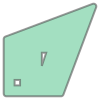

In [151]:
import numpy as np

def inflate_polygon_3D(polygon, distance):
    # unpack the polygon
    outer_ring, inner_rings = polygon
    # convert the lists of tuples into numpy arrays
    outer_ring = np.array(outer_ring, dtype=np.float32)
    inner_rings = [np.array(inner_ring, dtype=np.float32) for inner_ring in inner_rings]
    # calculate the normal vectors of the faces of the outer ring
    n = len(outer_ring)
    normal_vectors = []
    for i in range(n):
        p1, p2, p3 = outer_ring[i], outer_ring[(i+1) % n], outer_ring[(i+2) % n]
        v1 = p2 - p1
        v2 = p3 - p1
        normal_vector = np.cross(v1, v2)
        normal_vector /= np.linalg.norm(normal_vector)
        normal_vectors.append(normal_vector)
    # move each vertex along the normal vectors by the specified distance
    inflated_outer_ring = [p + distance*normal_vectors[i % n] for i, p in enumerate(outer_ring)]
    inflated_inner_rings = [[p + distance*normal_vectors[i % n] for i, p in enumerate(inner_ring)] for inner_ring in inner_rings]
    # pack the inflated polygon
    inflated_polygon = (inflated_outer_ring, inflated_inner_rings)
    return inflated_polygon

# Define a test polygon
outer_ring = [(0, 0, 0), (10, 0, 0), (16, 16, 0), (0, 10, 0)]
inner_ring1 = [(1, 1, 0), (3, 1, 0), (3, 3, 0), (1, 3, 0)]
inner_ring2 = [(6, 6, 0), (6, 2, 0), (8, 8, 0), (6, 8, 0)]

polygon = (outer_ring, [inner_ring1, inner_ring2])

# Inflate the polygon by a distance of 2
inflate_polygon_3D(polygon, 2)
polygon = Polygon(outer_ring, [inner_ring1, inner_ring2])
print(polygon.buffer(0.5))
polygon.buffer(0.5)


In [168]:
import numpy as np
import plotly.graph_objs as go

class SurfaceMesh:

    def __init__(self, x, y, z):
        self.vertex_coords = np.array([x, y, z]).T
        self.uv_coords = np.array([x, y]).T

    def get_vertex_indices(self, uv):
        """
        Returns the indices of the vertices that correspond to a given UV coordinate
        """
        i, j = np.searchsorted(self.uv_coords[:,0], uv[0]), np.searchsorted(self.uv_coords[:,1], uv[1])
        i, j = i-1, j-1
        return i, j

    def get_barycentric_weights(self, uv):
        """
        Returns the barycentric weights for a given UV coordinate
        """
        i, j = self.get_vertex_indices(uv)
        u, v = uv
        x1, y1 = self.uv_coords[i,0], self.uv_coords[j,1]
        x2, y2 = self.uv_coords[i+1,0], self.uv_coords[j+1,1]
        return (x2 - u) / (x2 - x1), (y2 - v) / (y2 - y1)
    
    def sample_points(self, distance, num_points):
        """
        sample points on the 3D surface at a constant distance
        """
        # Generate a set of random UV coordinates
        uv_samples = np.random.rand(num_points, 2)
        
        # Map the UV coordinates back to the 3D surface
        xyz_samples = np.zeros((num_points, 3))
        for i in range(num_points):
            uv = uv_samples[i]
            vertex_indices = self.get_vertex_indices(uv)
            weights = self.get_barycentric_weights(uv)
            xyz = np.zeros(3)
            for j in range(3):
                xyz += weights[j] * self.vertex_coords[vertex_indices[j]]
            xyz_samples[i] = xyz

        # Filter the points to keep only those that are at the desired distance
        filtered_points = []
        for point in xyz_samples:
            if np.linalg.norm(point) <= distance:
                filtered_points.append(point)
        return filtered_points

    def sample_points_gen(surface_mesh, distance, num_points):
        for i in range(num_points):
            # uv = np.random.rand(2)
            uv = np.random.rand(2) * [surface_mesh.uv_coords[:,0].max(), surface_mesh.uv_coords[:,1].max()]
            vertex_indices = surface_mesh.get_vertex_indices(uv)
            weights = surface_mesh.get_barycentric_weights(uv)
            xyz = np.zeros(3)
            for j in range(3):
                xyz += weights[j] * surface_mesh.vertex_coords[vertex_indices[j]]
            if np.linalg.norm(xyz) <= distance:
                yield xyz


# Create a test surface
x, y = np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create a SurfaceMesh object
surface_mesh = SurfaceMesh(X, Y, Z)

# Sample points on the surface at a constant distance
distance = 0.5
num_points = 50
points = surface_mesh.sample_points_gen(distance, num_points)
points

# # Create a 3D surface trace
# surface = go.Surface(x=x, y=y, z=Z, colorscale='Viridis')

# # Create a scatter trace for the sampled points
# scatter = go.Scatter3d(x=[p[0] for p in points], y=[p[1] for p in points], z=[p[2] for p in points], mode='markers', marker=dict(size=3, color='red'))

# # Create a layout for the 3D plot
# layout = go.Layout(scene=dict(xaxis=dict(title='x'), yaxis=dict(title='y'), zaxis=dict(title='z')))

# # Create a Figure object
# fig = go.Figure(data=[surface, scatter], layout=layout)

# # Show the figure
# fig.show()




<generator object SurfaceMesh.sample_points_gen at 0x7fd139d38eb0>

[(1, 1, 1), (2.3, 2, 2), (3, 3, 3), (10, 10, 10)]


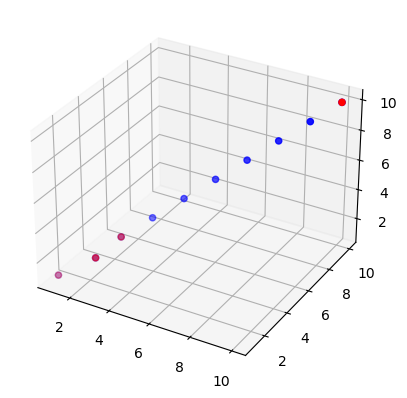

In [183]:
import numpy as np

def rdp_simplify_3D(points, epsilon):
    """
    Simplifies a set of 3D polylines using the Ramer-Douglas-Peucker algorithm
    :param points: list of 3D points (x, y, z)
    :param epsilon: tolerance distance for simplification
    :return: list of simplified 3D points
    """
    def point_line_distance(point, start, end):
        """
        Calculates the distance between a point and a line
        :param point: 3D point
        :param start: start point of line
        :param end: end point of line
        :return: distance
        """
        x, y, z = point
        x1, y1, z1 = start
        x2, y2, z2 = end
        numer = abs((y2-y1)*x - (x2-x1)*y + x2*y1 - y2*x1)
        denom = ((y2-y1)**2 + (x2-x1)**2 + (z2-z1)**2)**0.5
        return numer / denom

    def rdp_recursive(points, epsilon, start, end):
        """
        Recursive function for Ramer-Douglas-Peucker algorithm
        :param points: list of 3D points
        :param epsilon: tolerance distance
        :param start: start index of line segment
        :param end: end index of line segment
        :return: list of simplified 3D points
        """
        dmax = 0
        index = 0
        for i in range(start+1, end):
            d = point_line_distance(points[i], points[start], points[end])
            if d > dmax:
                index = i
                dmax = d

        if dmax > epsilon:
            r1 = rdp_recursive(points, epsilon, start, index)
            r2 = rdp_recursive(points, epsilon, index, end)
            return r1[:-1] + r2
        else:
            return [points[start], points[end]]
    
    if len(points) < 2:
        return points
    else:
        return rdp_recursive(points, epsilon, 0, len(points)-1)


# Test data
points = [(1, 1, 1), (2.3, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5), (6, 6, 6), (7, 7, 7), (8, 8, 8), (9, 9, 9), (10, 10, 10)]
# np.random.seed(0)
# points = np.random.rand(30, 3)
# Helix test data
# theta = np.linspace(0, 2*np.pi, 50)
# x = np.cos(theta)
# y = np.sin(theta)
# z = theta
# points = np.array(list(zip(x, y, z)))
# Add noise to the points
# noise = np.random.normal(0, 0.05, points.shape)
# points = points + noise

# Simplify polylines with epsilon = 2
simplified_points = rdp_simplify_3D(points, 0.1)
print(simplified_points)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original points
ax.scatter([p[0] for p in points], 
           [p[1] for p in points], 
           [p[2] for p in points], 
           c='b', marker='o')

# Plot simplified points
ax.scatter([p[0] for p in simplified_points], 
           [p[1] for p in simplified_points], 
           [p[2] for p in simplified_points], 
           c='r', marker='o')

# Show plot
plt.show()


In [ ]:
import numpy as np
from typing import List, Tuple

def point_line_distance(point, start, end):
        """
        Calculates the distance between a point and a line
        :param point: 3D point
        :param start: start point of line
        :param end: end point of line
        :return: distance
        """
        x, y, z = point
        x1, y1, z1 = start
        x2, y2, z2 = end
        numer = abs((y2-y1)*x - (x2-x1)*y + x2*y1 - y2*x1)
        denom = ((y2-y1)**2 + (x2-x1)**2 + (z2-z1)**2)**0.5
        return numer / denom

def filter_points_3D(points: List[Tuple[float, float, float]], threshold: float):
    filtered_points = []
    idx = 1
    n = len(points)
    while idx < (n - 1):
        next = idx + 1
        prev = idx - 1
        point = np.array(points[idx])
        prev_point = np.array(points[prev])
        next_point = np.array(points[next])
        dist = point_line_distance(point, prev_point, next_point)
        if dist > threshold:
            filtered_points.append(points[prev])
            filtered_points.append(points[idx])
            filtered_points.append(points[next])
            idx = next + 1
        else:
            idx = idx + 1
            
    filtered_points.append(points[-1])
    return filtered_points

points = [(1, 1, 1), (2.3, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5), (6, 6, 6), (7, 7.3, 7), (8, 8, 8), (9, 9, 9), (10, 10, 10), (10.3, 10.3, 10.3)]
# Simplify polylines with epsilon = 2
# points = np.random.rand(20, 3)
simplified_points = filter_points_3D(points, 0.1)
print(simplified_points)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original points
ax.scatter([p[0] for p in points], 
           [p[1] for p in points], 
           [p[2] for p in points], 
           c='b', marker='o')

# Plot simplified points
ax.scatter([p[0] for p in simplified_points], 
           [p[1] for p in simplified_points], 
           [p[2] for p in simplified_points], 
           c='r', marker='o')

# Show plot
plt.show()

: 

In [2]:
import open3d as o3d

meshes = [o3d.geometry.TriangleMesh.create_sphere(), 
          o3d.geometry.TriangleMesh.create_cylinder(),
          o3d.geometry.TriangleMesh.create_box()]

# Concatenate the vertices and triangles of all meshes
vertices = o3d.utility.Vector3dVector()
triangles = o3d.utility.Vector3iVector()
for mesh in meshes:
    vertices.extend(mesh.vertices)
    triangles_offset = len(vertices) - len(mesh.vertices)
    triangles.extend([[x + triangles_offset, y + triangles_offset, z + triangles_offset] for x, y, z in mesh.triangles])

# Create a new mesh from the concatenated data
final_mesh = o3d.geometry.TriangleMesh()
final_mesh.vertices = vertices
final_mesh.triangles = triangles
final_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([final_mesh])
